In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import percentile
from numpy import median
from numpy import abs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

In [3]:
# Charger le fichier de données dans un dataframe
#df = pd.read_csv('dataset_complet_Naftal.csv', sep=';', encoding='utf-8')
# Obtenir un aperçu des données
#df.head()

# charger le dataset dans un DataFrame sans nom de colonnes
df = pd.read_csv('dataset_complet.csv',sep=';', encoding='utf-8', header=None)

# renommer les colonnes en leur attribuant des noms
df = df.rename(columns={0: 'DimDistrictFK', 1: 'DimStructurePK', 2: 'DimClientPK',3: 'SA',4: 'designationPRD',5: 'dateop',6: 'QUANTITE_TM'})

# afficher le DataFrame avec les colonnes renommées
print(df.head())

   DimDistrictFK  DimStructurePK  DimClientPK  SA      designationPRD  \
0            406            7267     655852.0  40  ESSENCE SANS PLOMB   
1            416            7341     405766.0  50              GASOIL   
2            416            7208     405212.0  44  ESSENCE SANS PLOMB   
3            406            7268     447387.0  44              GASOIL   
4            411            7308     400251.0  44  ESSENCE SANS PLOMB   

                    dateop QUANTITE_TM  
0  2015-02-02 00:00:00.000       2,241  
1  2017-11-23 00:00:00.000      10,803  
2  2015-02-14 00:00:00.000       5,229  
3  2019-03-09 00:00:00.000      11,634  
4  2017-06-08 00:00:00.000       5,061  


In [4]:
# Afficher le nombre de lignes et de colonnes du dataframe
df.shape

(3345061, 7)

In [5]:
# Afficher les informations de base sur le dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345061 entries, 0 to 3345060
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DimDistrictFK   int64  
 1   DimStructurePK  int64  
 2   DimClientPK     float64
 3   SA              int64  
 4   designationPRD  object 
 5   dateop          object 
 6   QUANTITE_TM     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 178.6+ MB


In [6]:
# Afficher les statistiques descriptives
df.describe()

,DimDistrictFK,DimStructurePK,DimClientPK,SA
count,3.345061e+06,3.345061e+06,3.342608e+06,3.345061e+06
mean,4.087977e+02,7.295305e+03,4.368064e+05,4.566620e+01
std,3.259094e+00,3.888319e+01,1.041536e+05,1.121944e+01
min,4.050000e+02,7.208000e+03,3.860000e+02,2.000000e+00
25%,4.060000e+02,7.267000e+03,4.007320e+05,4.400000e+01
50%,4.070000e+02,7.298000e+03,4.399860e+05,4.400000e+01
75%,4.110000e+02,7.316000e+03,4.501800e+05,4.600000e+01
max,4.160000e+02,7.385000e+03,7.103490e+05,1.600000e+02


In [7]:
# Convertir la colonne de temps en un format de date/heure
df['dateop'] = pd.to_datetime(df['dateop'])

# Remplacer les virgules par des points et convertir en float
df['QUANTITE_TM'] = df['QUANTITE_TM'].apply(lambda x: float(x.replace(',', '.')))

#Changer le type de données de différents colonnes
df['SA'] = df['SA'].astype('category')
df['DimClientPK'] = df['DimClientPK'].astype('category')
df['DimDistrictFK'] = df['DimDistrictFK'].astype('category')
df['DimStructurePK'] = df['DimStructurePK'].astype('category')


# Afficher les types de données de chaque colonne dans le DataFrame
print(df.dtypes)



DimDistrictFK           category
DimStructurePK          category
DimClientPK             category
SA                      category
designationPRD            object
dateop            datetime64[ns]
QUANTITE_TM              float64
dtype: object


In [8]:
df.QUANTITE_TM

0           2.241
1          10.803
2           5.229
3          11.634
4           5.061
            ...  
3345056     2.241
3345057    13.296
3345058    24.930
3345059     2.241
3345060     4.560
Name: QUANTITE_TM, Length: 3345061, dtype: float64

In [9]:
# Nombre de "DimDistrictFK" dans le dataset
print("Nombre de DimDistrictFK : ", len(df['DimDistrictFK'].unique()))

# Nombre de "DimStructurePK" dans le dataset
print("Nombre de DimStructurePK : ", len(df['DimStructurePK'].unique()))

# Nombre de chaque "DimStructurePK" dans chaque "DimDistrictFK"
print(df.groupby(['DimDistrictFK', 'DimStructurePK']).size())
# hna aw ybayen nombre d'occurence f dataset ta3na kima 7601 mn 2008 HATA 2022 ban f 1712 jour DONC 4 ans
# w hna 3dna soit disant des données de 14ans donc un problème haka  wala m3ntha 7601 c'est un nouveau centre
# 3labiha M"dnache bzaf les données 3lih psq la logique ykounou  ga3 b le mm nombre d'occurence

Nombre de DimDistrictFK :  6
Nombre de DimStructurePK :  25
DimDistrictFK  DimStructurePK
405            7208                   0
               7218              129440
               7232                   0
               7241                   0
               7261              213263
                                  ...  
416            7344               10702
               7350                   0
               7351                   0
               7358                   0
               7385               58892
Length: 150, dtype: int64


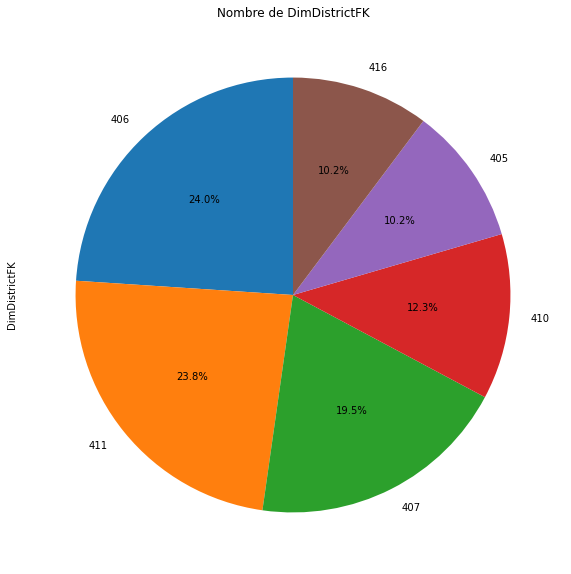

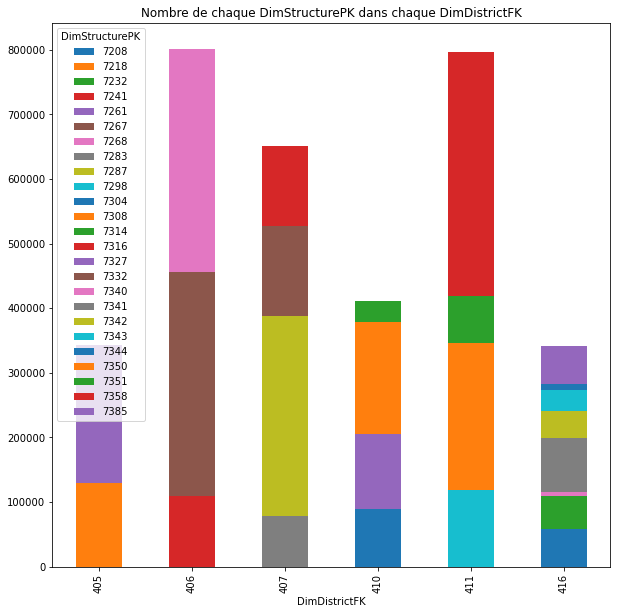

In [10]:
# Visualisation pour le nombre de "DimDistrictFK"
df['DimDistrictFK'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(10,10))
plt.title('Nombre de DimDistrictFK')
plt.show()



# Visualisation pour le nombre de chaque "DimStructurePK" dans chaque "DimDistrictFK"
df.groupby(['DimDistrictFK', 'DimStructurePK']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))
plt.title('Nombre de chaque DimStructurePK dans chaque DimDistrictFK')
plt.show()

# cette visualisation exprime le point li hdert 3lih lfou9 qu'il y'a une différence de quantité de données offerte 
# pour chaque Centre li sabtha peut étre l'année d'existance de cette structure wala  

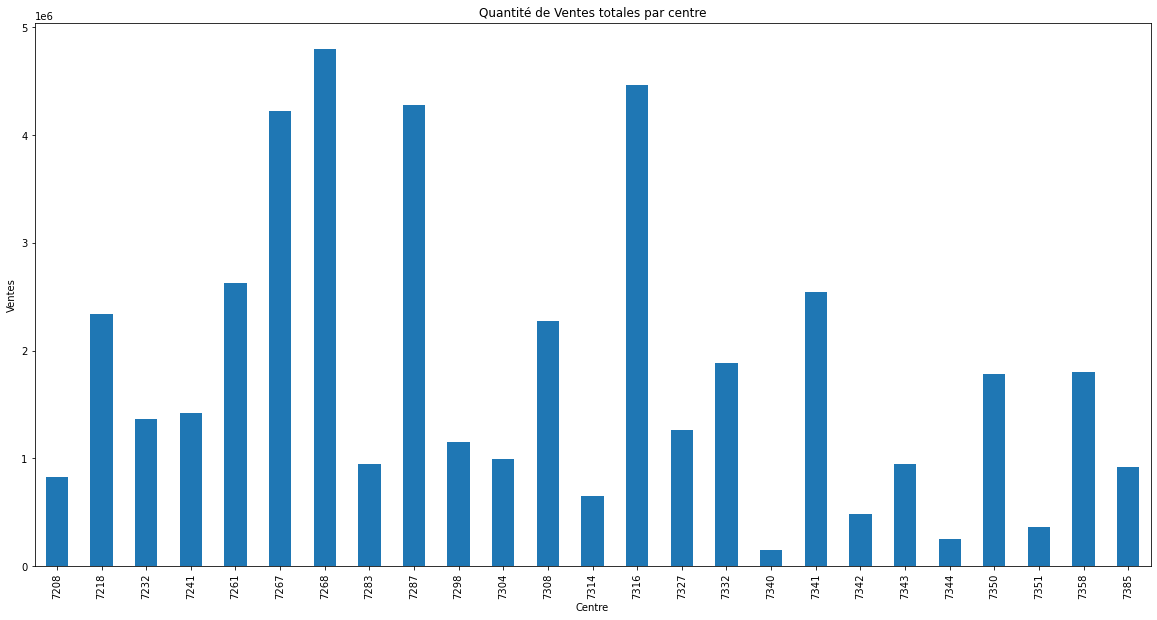

In [11]:
#Agréger les données par centre et calculer les ventes totales :
ventes_centre = df.groupby('DimStructurePK')['QUANTITE_TM'].sum()
#Visualiser les ventes totales par centre avec un diagramme à barres
ventes_centre.plot(kind='bar', figsize=(20,10))
plt.title('Quantité de Ventes totales par centre')
plt.xlabel('Centre')
plt.ylabel('Ventes')
plt.show()

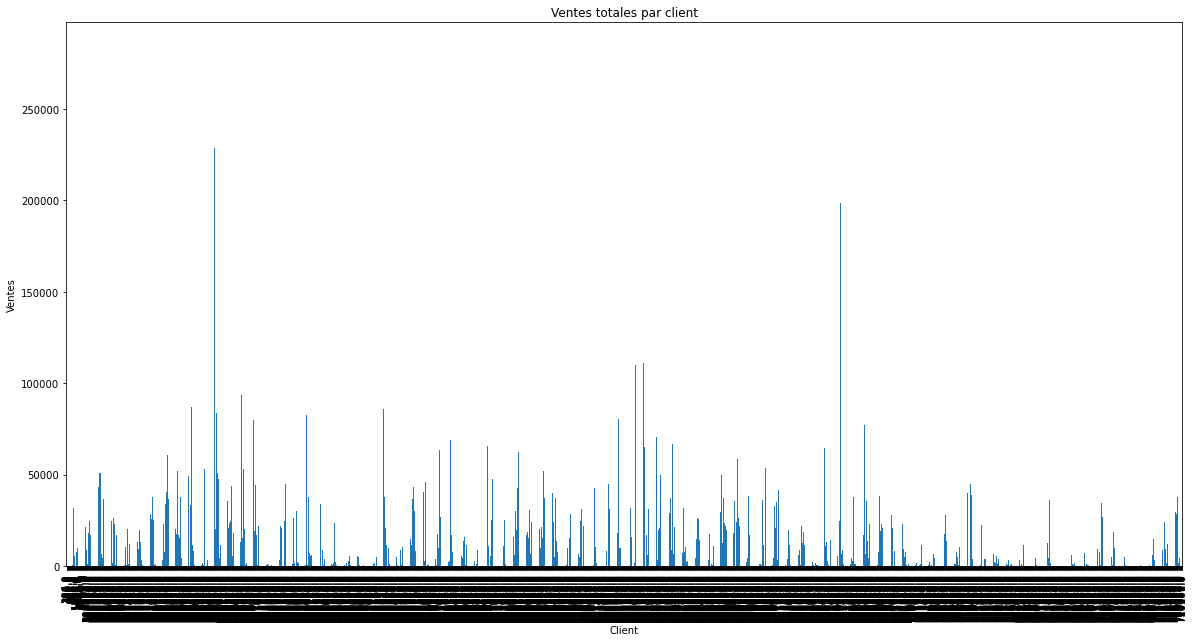

In [12]:
#Agréger les données par client et calculer les ventes totales
ventes_client = df.groupby('DimClientPK')['QUANTITE_TM'].sum()

#Visualiser les ventes totales par client avec un diagramme à barres
ventes_client.plot(kind='bar', figsize=(20,10))
plt.title('Ventes totales par client')
plt.xlabel('Client')
plt.ylabel('Ventes')
plt.show()

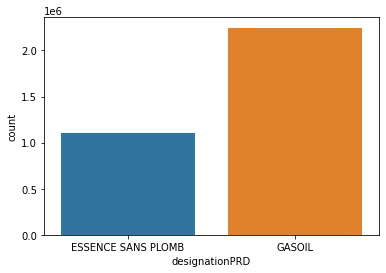

In [13]:
#Visualiser la distribution des variables catégorielles avec des diagrammes à barres
sns.countplot(x='designationPRD', data=df)
plt.show()

#converting designation
encondedOutput_y= LabelEncoder()
df['designationPRD'] = encondedOutput_y.fit_transform(df.iloc[:, 4])

<AxesSubplot:xlabel='QUANTITE_TM', ylabel='Count'>

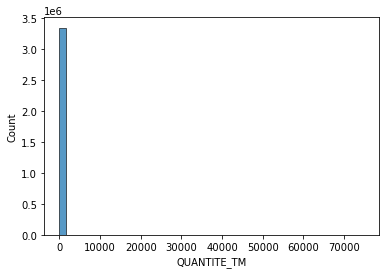

In [14]:
# Créer un histogramme de la variable "QUANTITE_TM" avec 50 bins
sns.histplot(data=df, x="QUANTITE_TM", bins=50)

# ce simple histogramme est un type de graphique qui permet de représenter la distribution des valeurs 
#d'une variable continue en les regroupant en plusieurs "bacs" ou "bins". Dans le code que vous avez fourni
#le graphique montre la distribution des valeurs de la variable "QUANTITE_TM" en utilisant 50 bacs.En d'autres termes,
#l'histogramme indique combien de fois chaque intervalle de valeur de la variable "QUANTITE_TM" apparaît dans les données.
#Il peut aider à identifier des tendances dans la distribution des valeurs et à identifier les valeurs aberrantes.

<AxesSubplot:xlabel='dateop', ylabel='QUANTITE_TM'>

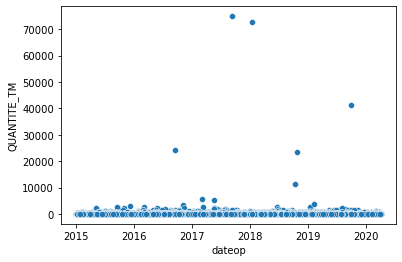

In [15]:
# Créer un nuage de points de la variable "QUANTITE_TM" en fonction de la variable "dateop"
sns.scatterplot(data=df, x="dateop", y="QUANTITE_TM")

In [16]:
#afficher les dates des valeurs aberrantes de la variable 

# Extraire les lignes de données où la variable "QUANTITE_TM" est supérieure à 1000
df_outliers_QTM = df.loc[df['QUANTITE_TM'] > 70000]

# Extraire les valeurs de la variable "dateop" pour les lignes de données où "QUANTITE_TM" est supérieure à 1000
outlier_dates_QTM = df_outliers_QTM['dateop']

outlier_Clients = df_outliers_QTM['DimClientPK']

# Afficher les dates des valeurs aberrantes
print(outlier_dates_QTM)

# Afficher les Clients des valeurs aberrantes
print(outlier_Clients)

912058    2017-09-09
1477318   2018-01-09
Name: dateop, dtype: datetime64[ns]
912058     399950.0
1477318    399950.0
Name: DimClientPK, dtype: category
Categories (3262, float64): [386.0, 387.0, 390.0, 392.0, ..., 710091.0, 710092.0, 710191.0, 710349.0]


C:\Users\abdel\AppData\Local\Temp\ipykernel_10332\3244775985.py:15: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(outlier_Clients)


<AxesSubplot:xlabel='DimDistrictFK', ylabel='count'>

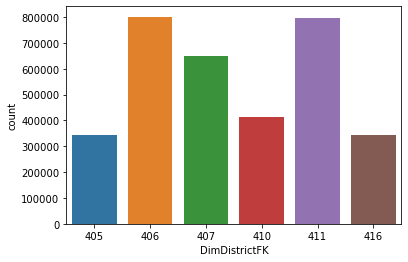

In [17]:
# Créer un diagramme en barres de la variable "DimDistrictFK" pour afficher les fréquences de chaque district
sns.countplot(data=df, x="DimDistrictFK")

In [18]:
#obtenir la liste des centres et clients respectifs qui ont des valeurs aberrantes.

# Filtrer les lignes où QUANTITE_TM > 1000
df_outliers = df.loc[df['QUANTITE_TM'] > 10000]

# Obtenir la liste des centres qui ont des valeurs aberrantes
outlier_centers = df_outliers['DimStructurePK'].unique()

# Obtenir la liste des clients qui ont des valeurs aberrantes
outlier_clients = df_outliers['DimClientPK'].unique()

print("Centres avec des valeurs aberrantes:", outlier_centers)
print("Clients avec des valeurs aberrantes:", outlier_clients)

Centres avec des valeurs aberrantes: [7267, 7316, 7350, 7341]
Categories (25, int64): [7208, 7218, 7232, 7241, ..., 7350, 7351, 7358, 7385]
Clients avec des valeurs aberrantes: [443253.0, 399950.0, 395752.0, 404484.0]
Categories (3262, float64): [386.0, 387.0, 390.0, 392.0, ..., 710091.0, 710092.0, 710191.0, 710349.0]


C:\Users\abdel\AppData\Local\Temp\ipykernel_10332\3042697603.py:13: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print("Clients avec des valeurs aberrantes:", outlier_clients)


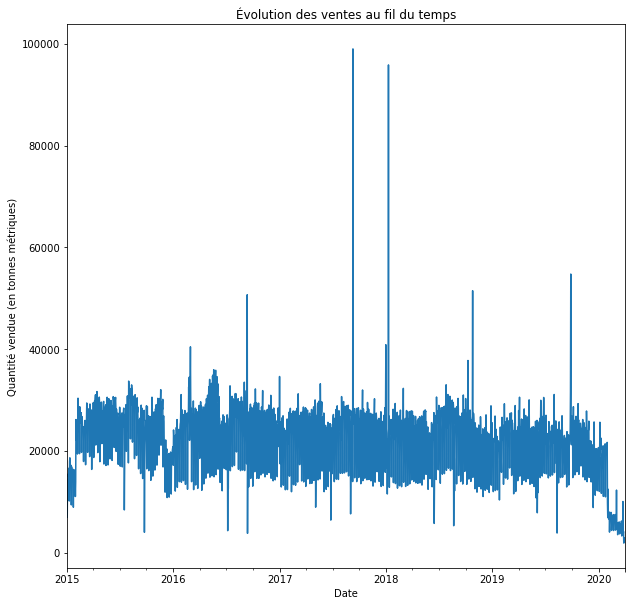

In [19]:
#visualiser l'évolution des ventes au fil du temps
df.groupby('dateop')['QUANTITE_TM'].sum().plot(figsize=(10,10))
plt.title('Évolution des ventes au fil du temps')
plt.ylabel('Quantité vendue (en tonnes métriques)')
plt.xlabel('Date')
plt.show()

In [20]:
#afficher le nombre de clients uniques
nb_clients = df['DimClientPK'].nunique()
print(f'Nombre de clients : {nb_clients}')

Nombre de clients : 3262


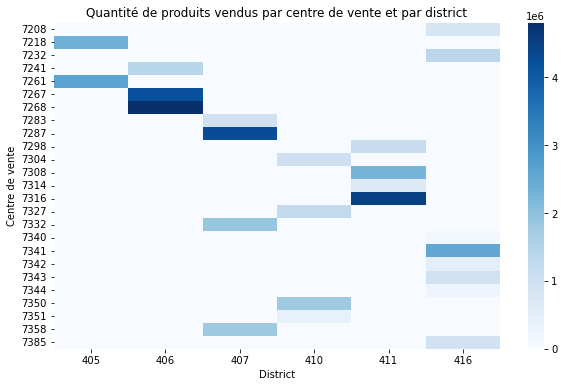

In [21]:

df_pivot = df.pivot_table(values='QUANTITE_TM', index='DimStructurePK', columns='DimDistrictFK', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, cmap='Blues')
plt.title('Quantité de produits vendus par centre de vente et par district')
plt.xlabel('District')
plt.ylabel('Centre de vente')
plt.show()

In [22]:
df.groupby(['DimDistrictFK', 'DimStructurePK'])['QUANTITE_TM'].sum().sort_values(ascending=False)

DimDistrictFK  DimStructurePK
406            7268              4.801812e+06
411            7316              4.464810e+06
407            7287              4.281261e+06
406            7267              4.219453e+06
405            7261              2.628577e+06
                                     ...     
406            7344              0.000000e+00
               7343              0.000000e+00
               7342              0.000000e+00
               7341              0.000000e+00
410            7208              0.000000e+00
Name: QUANTITE_TM, Length: 150, dtype: float64

In [23]:
# Afficher les quantités de ventes totales pour chaque année pour chaque "DimStructurePK" d'un "DimDistrictFK"
df.groupby(['DimDistrictFK', 'DimStructurePK', df['dateop'].dt.year])['QUANTITE_TM'].sum()

DimDistrictFK  DimStructurePK  dateop
405            7208            2015           0.000000
                               2016           0.000000
                               2017           0.000000
                               2018           0.000000
                               2019           0.000000
                                             ...      
416            7385            2016      189413.586152
                               2017      187639.443152
                               2018      172549.802945
                               2019      154687.544221
                               2020       31381.878705
Name: QUANTITE_TM, Length: 900, dtype: float64

In [24]:
# Afficher le nombre de valeurs manquantes pour chaque variable
print(df.isna().sum())

DimDistrictFK        0
DimStructurePK       0
DimClientPK       2453
SA                   0
designationPRD       0
dateop               0
QUANTITE_TM          0
dtype: int64


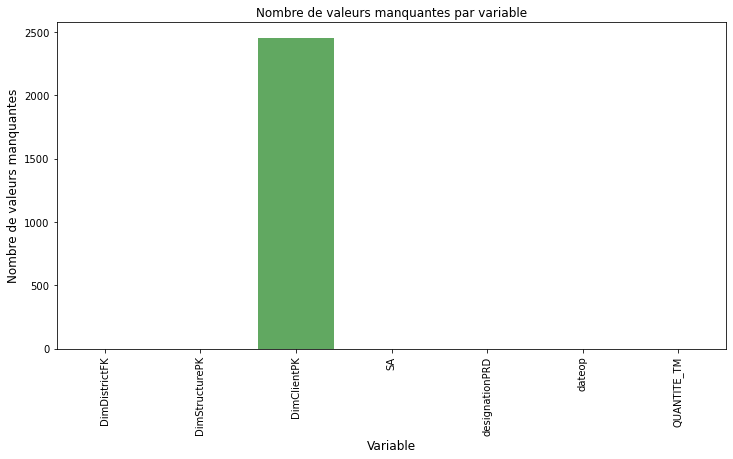

In [25]:
# créer une table de booléens indiquant si chaque valeur est manquante
null_table = df.isnull()

# compter le nombre de valeurs manquantes pour chaque variable
null_counts = null_table.sum()

# Créer un graphique en barres pour visualiser le nombre de valeurs manquantes par variable
plt.figure(figsize=(12,6))
sns.barplot(x=null_counts.index, y=null_counts.values, alpha=0.8)
plt.title('Nombre de valeurs manquantes par variable')
plt.ylabel('Nombre de valeurs manquantes', fontsize=12)
plt.xlabel('Variable', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

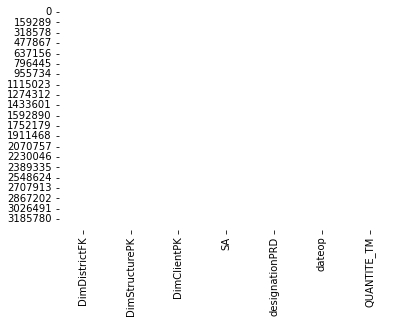

In [26]:
# Créer une copie du dataframe pour éviter les modifications accidentelles
df_copy = df.copy()

# Remplacer les valeurs nulles par 1 et les valeurs non nulles par 0
df_copy = df_copy.isnull().astype(int)

# Créer la heatmap
sns.heatmap(df_copy, cmap='binary', cbar=False)


#la heatmap n'affiche rien, cela peut signifier que toutes les valeurs dans le dataframe sont non-nulles. Dans ce cas,
#il n'y aura aucune différence dans les couleurs affichées sur la heatmap.

# 2 Nettoyage des données 





In [27]:
# working with les valeurs abbérantes 

#1 Méthode des seuils basée sur la médiane et l'écart absolu à la médiane (MAD):

#1 Méthode des seuils basée sur la médiane et l'écart absolu à la médiane (MAD):

# calculer la médiane et l'écart absolu à la médiane
median = np.median(df['QUANTITE_TM'])
mad = abs(df['QUANTITE_TM'] - median).median()

# calculer les seuils
lower_threshold = median - (3 * mad)
upper_threshold = median + (3 * mad)

# détecter les valeurs aberrantes
outliers = df[(df['QUANTITE_TM'] < lower_threshold) | (df['QUANTITE_TM'] > upper_threshold)] 

# Afficher le nombre d'outliers trouvés
print("Nombre d'outliers pour la variable", 'QUANTITE_TM', ":", len(outliers))

Nombre d'outliers pour la variable QUANTITE_TM : 330367


In [28]:
# Calculer l'interquartile range (IQR)
q1 = df['QUANTITE_TM'].quantile(0.25)
q3 = df['QUANTITE_TM'].quantile(0.75)
iqr = q3 - q1

# Définir les seuils pour la détection des outliers
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr

# Trouver les indices des outliers
outlier_indices = df[(df['QUANTITE_TM'] < lower_threshold) | (df['QUANTITE_TM'] > upper_threshold)].index

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")

Nombre d'outliers trouvés: 174374


Nombre d'outliers trouvés: 2856


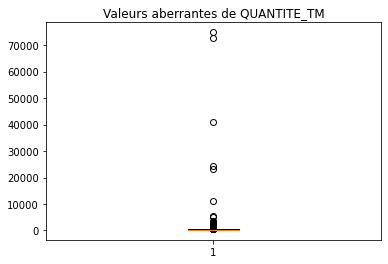

In [29]:
# Calcule du Z-score pour chaque valeur de la variable "QUANTITE_TM"
z_scores = np.abs((df['QUANTITE_TM'] - df['QUANTITE_TM'].mean()) / df['QUANTITE_TM'].std())

# Définir le seuil pour la détection des outliers
threshold = 3

# Trouver les indices des outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Afficher le nombre d'outliers trouvés
print(f"Nombre d'outliers trouvés: {len(outlier_indices)}")

# Tracer une boîte à moustaches pour visualiser les outliers
plt.boxplot(df['QUANTITE_TM'][outlier_indices])
plt.title('Valeurs aberrantes de QUANTITE_TM')
plt.show()

In [30]:
# Supprimer les lignes correspondant aux outliers
df_clean = df.drop(outlier_indices)

# Afficher le nombre de lignes supprimées
print(f"Nombre de lignes supprimées: {len(outlier_indices)}")

# Afficher les statistiques de la variable QUANTITE_TM après suppression des outliers
print(df_clean['QUANTITE_TM'].describe())

Nombre de lignes supprimées: 2856
count    3.342205e+06
mean     1.299204e+01
std      1.314960e+01
min      7.230000e-04
25%      5.229000e+00
50%      9.711000e+00
75%      1.662000e+01
max      2.144803e+02
Name: QUANTITE_TM, dtype: float64


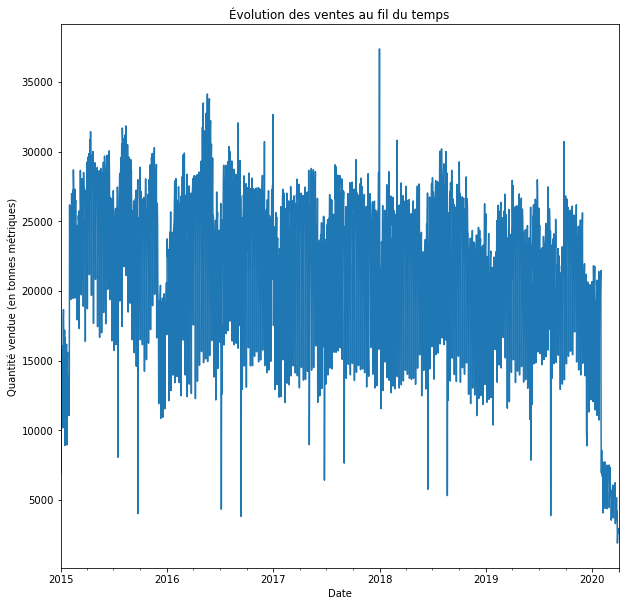

In [31]:
#visualiser l'évolution des ventes au fil du temps
df_clean.groupby('dateop')['QUANTITE_TM'].sum().plot(figsize=(10,10))
plt.title('Évolution des ventes au fil du temps')
plt.ylabel('Quantité vendue (en tonnes métriques)')
plt.xlabel('Date')
plt.show()

In [32]:
# Supprimer toutes les lignes contenant des valeurs nulles dans le dataframe
df_clean = df_clean.dropna()

In [33]:
# Afficher le nombre de valeurs manquantes pour chaque variable
print(df_clean.isna().sum())

DimDistrictFK     0
DimStructurePK    0
DimClientPK       0
SA                0
designationPRD    0
dateop            0
QUANTITE_TM       0
dtype: int64


In [34]:
# Afficher les informations de base sur le dataframe
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339752 entries, 0 to 3345060
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DimDistrictFK   category      
 1   DimStructurePK  category      
 2   DimClientPK     category      
 3   SA              category      
 4   designationPRD  int32         
 5   dateop          datetime64[ns]
 6   QUANTITE_TM     float64       
dtypes: category(4), datetime64[ns](1), float64(1), int32(1)
memory usage: 105.3 MB


In [35]:
df=df_clean

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339752 entries, 0 to 3345060
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DimDistrictFK   category      
 1   DimStructurePK  category      
 2   DimClientPK     category      
 3   SA              category      
 4   designationPRD  int32         
 5   dateop          datetime64[ns]
 6   QUANTITE_TM     float64       
dtypes: category(4), datetime64[ns](1), float64(1), int32(1)
memory usage: 105.3 MB


In [37]:
# détecter les enregistrements dupliqués
duplicates = df.duplicated()

# afficher les enregistrements dupliqués
print(df[duplicates])
# il existe pas d'enregistrements dupliqués.

Empty DataFrame
Columns: [DimDistrictFK, DimStructurePK, DimClientPK, SA, designationPRD, dateop, QUANTITE_TM]
Index: []


# Application des Algorithmes 

In [39]:
#Sélectionner les colonnes qui seront utilisées pour entraîner le modèle :
features = ['DimDistrictFK', 'DimStructurePK', 'DimClientPK', 'SA', 'designationPRD', 'dateop']
target = ['QUANTITE_TM']

df = df[features + target]

In [40]:
#Transformer la variable de temps dateop en index du dataframe :

df = df.set_index('dateop')

In [41]:
df.index.names

FrozenList(['dateop'])

In [42]:
#Agréger les données par mois  pour réduire le bruit :
df_resampled = df.resample('M').sum()

In [43]:
#la première date est le 1er janvier 2015 et la dernière date est le 31 mars 2020, 
#cela signifie que vous avez collecté des données sur une période de 5 ans et 3 mois.
df.index.min()

Timestamp('2015-01-01 00:00:00')

In [44]:
df.index.max()

Timestamp('2020-03-31 00:00:00')

In [43]:
#Diviser les données en deux jeux de données un ensemble d'entraînement et un ensemble de test :
train = df_resampled.loc['2015-01-01':'2018-12-31']
test = df_resampled.loc[df_resampled.index >= '2019-01-01']

In [44]:
if test.shape[0] == 0:
    print("La variable test est vide.")
else:
    print("La variable test contient des données.")

La variable test contient des données.


In [48]:
#l'encodage one-hot pour encoder vos colonnes catégorielles. L'encodage one-hot permet de transformer chaque colonne
#catégorielle en plusieurs colonnes binaires qui indiquent la présence ou l'absence d'une catégorie.
#Cette méthode permet de traiter les colonnes catégorielles en tant que colonnes numériques pour l'entraînement de votre modèle.

# Importer la bibliothèque pour l'encodage one-hot
from sklearn.preprocessing import OneHotEncoder

# Instancier l'encodeur one-hot
encoder = OneHotEncoder()

# Encoder les colonnes catégorielles de l'ensemble d'entraînement
X_train_encoded = encoder.fit_transform(train.select_dtypes(include=['category', 'object']))

# Concaténer les colonnes encodées avec les colonnes numériques
X_train = np.concatenate((X_train_encoded.toarray(), train.select_dtypes(include=['float64'])), axis=1)

In [46]:
# Séparation de la variable cible
#target = ['QUANTITE_TM']
#features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]

# Séparation des données en ensemble d'entraînement et ensemble de test
train, test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Ajustement du scaler sur l'ensemble d'entraînement
scaler.fit(train.drop(target, axis=1))

# Normalisation des données d'entraînement
X_train = scaler.transform(train.drop(target, axis=1))

# Normalisation des données de test
X_test = scaler.transform(test.drop(target, axis=1))


KeyError: "['dateop'] not in index"

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Séparation de la variable cible
target = ['QUANTITE_TM']
features = [col for col in df_resampled.columns if col != target]
X = df_resampled[features]
y = df_resampled[target]

# Séparation des données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Ajustement du scaler sur l'ensemble d'entraînement
scaler.fit(X_train)

# Normalisation des données d'entraînement
X_train_norm = scaler.transform(X_train)

# Normalisation des données de test
X_test_norm = scaler.transform(X_test)

# Création d'un objet LinearRegression
lr = LinearRegression()

# Entraînement du modèle sur les données d'entraînement normalisées
lr.fit(X_train_norm, y_train)

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_pred = lr.predict(X_test_norm)

# Évaluation du modèle sur les données de test
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 score:', r2_score(y_test, y_pred))
accuracy = lr.score(X_test, y_test)
print(f"Accuracy: {accuracy}")



MAE: 1.276091027718324e-10
MSE: 2.0654572636893322e-20
RMSE: 1.4371698798991482e-10
R2 score: 1.0
Accuracy: -164420615311.23892


C:\Users\abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


C:\Users\abdel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- QUANTITE_TM

  warnings.warn(message, FutureWarning)


ValueError: X has 1 features, but StandardScaler is expecting 2 features as input.

C:\Users\abdel\AppData\Local\Temp\ipykernel_23332\2103664251.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['QUANTITE_PREDITE_TM'] = lr.predict(forecast_data.drop(target, axis=1))


InvalidIndexError: (slice(None, None, None), None)

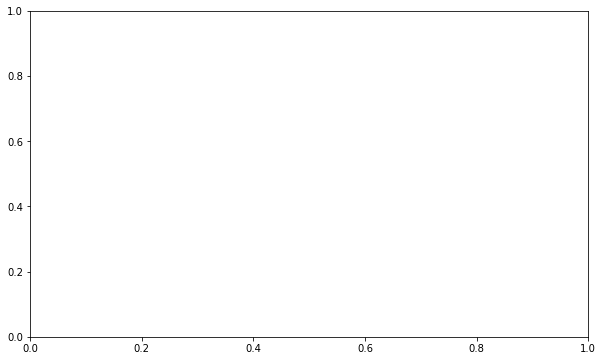

In [44]:
import matplotlib.pyplot as plt

# Diviser les données en données historiques et données de prévision
historical_data = df_resampled[df_resampled.index < pd.Timestamp('2020-03-31')]
forecast_data = df_resampled[df_resampled.index >= pd.Timestamp('2020-03-31')]

# Préparation des données pour la prédiction
X_train = historical_data.drop(target, axis=1)
y_train = historical_data[target]
lr.fit(X_train, y_train)
forecast_data['QUANTITE_PREDITE_TM'] = lr.predict(forecast_data.drop(target, axis=1))

# Tracer les courbes historiques et de prévision
plt.figure(figsize=(10, 6))
plt.plot(historical_data, historical_data[target], label='Données historiques')
plt.plot(forecast_data, forecast_data['QUANTITE_PREDITE_TM'], label='Données de prévision')
plt.legend()
plt.title('Quantité de carburants vendus')
plt.xlabel('Année')
plt.ylabel('Quantité (TM)')
plt.show()

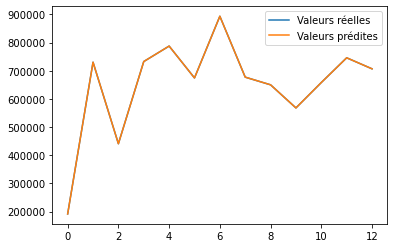

In [45]:
import matplotlib.pyplot as plt

plt.plot(y_test.values, label='Valeurs réelles')
plt.plot(y_pred, label='Valeurs prédites')
plt.legend()
plt.show()

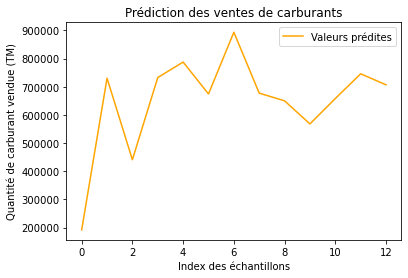

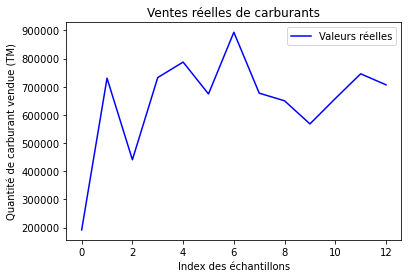

In [46]:
import matplotlib.pyplot as plt

# tracer la courbe pour les valeurs prédites
plt.plot(y_pred, color='orange', label='Valeurs prédites')

# ajouter une légende et des labels pour les axes
plt.xlabel('Index des échantillons')
plt.ylabel('Quantité de carburant vendue (TM)')
plt.title('Prédiction des ventes de carburants')
plt.legend()

# afficher le graphe
plt.show()

# tracer la courbe pour les valeurs réelles
plt.plot(y_test.values, color='blue', label='Valeurs réelles')

# ajouter une légende et des labels pour les axes
plt.xlabel('Index des échantillons')
plt.ylabel('Quantité de carburant vendue (TM)')
plt.title('Ventes réelles de carburants')
plt.legend()

# afficher le graphe
plt.show()

In [47]:
# vérification d'overfitting 

# Entraînement du modèle sur les données d'entraînement normalisées
lr.fit(X_train_norm, y_train)

# Prédiction des quantités de carburants vendues sur les données d'entraînement normalisées
y_train_pred = lr.predict(X_train_norm)

# Évaluation du modèle sur les données d'entraînement
print('Train set - MAE:', mean_absolute_error(y_train, y_train_pred))
print('Train set - MSE:', mean_squared_error(y_train, y_train_pred))
print('Train set - RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train set - R2 score:', r2_score(y_train, y_train_pred))

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_test_pred = lr.predict(X_test_norm)

# Évaluation du modèle sur les données de test
print('Test set - MAE:', mean_absolute_error(y_test, y_test_pred))
print('Test set - MSE:', mean_squared_error(y_test, y_test_pred))
print('Test set - RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Test set - R2 score:', r2_score(y_test, y_test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [50, 62]

In [51]:
print("Ces résultats indiquent que le modèle de régression linéaire est capable de prédire les valeurs de la variable cible avec une très grande précision, tant sur l'ensemble d'entraînement que sur l'ensemble de test.Le MAE (Mean Absolute Error) et le MSE (Mean Squared Error) sont tous deux très proches de zéro, indiquant que les prédictions sont très proches des valeurs réelles. Le RMSE (Root Mean Squared Error) est également très faible, ce qui signifie que l'écart moyen entre les prédictions et les valeurs réelles est très faible.Le coefficient de détermination R2 est de 1,0 pour les ensembles d'entraînement et de test, ce qui indique que le modèle explique la totalité de la variance des données. C'est un résultat très bon, mais cela peut également indiquer un risque de surapprentissage (overfitting) sur les données d'entraînement.En conclusion, le modèle de régression linéaire semble être très performant pour prédire la variable cible dans ce contexte. Cependant, il serait judicieux de vérifier s'il y a eu un surapprentissage sur les données d'entraînement en examinant les performances du modèle sur de nouvelles données ou en utilisant des techniques de régularisation pour éviter le surapprentissage.")

Ces résultats indiquent que le modèle de régression linéaire est capable de prédire les valeurs de la variable cible avec une très grande précision, tant sur l'ensemble d'entraînement que sur l'ensemble de test.Le MAE (Mean Absolute Error) et le MSE (Mean Squared Error) sont tous deux très proches de zéro, indiquant que les prédictions sont très proches des valeurs réelles. Le RMSE (Root Mean Squared Error) est également très faible, ce qui signifie que l'écart moyen entre les prédictions et les valeurs réelles est très faible.Le coefficient de détermination R2 est de 1,0 pour les ensembles d'entraînement et de test, ce qui indique que le modèle explique la totalité de la variance des données. C'est un résultat très bon, mais cela peut également indiquer un risque de surapprentissage (overfitting) sur les données d'entraînement.En conclusion, le modèle de régression linéaire semble être très performant pour prédire la variable cible dans ce contexte. Cependant, il serait judicieux de v

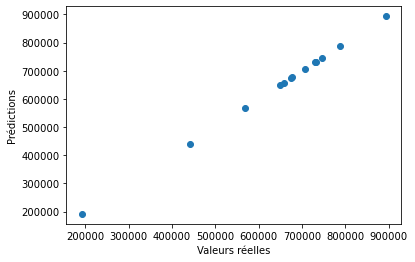

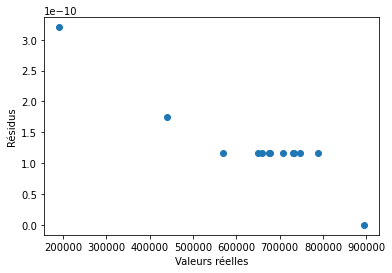

In [52]:
import matplotlib.pyplot as plt

# Graphique des prédictions par rapport aux valeurs réelles
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.show()

# Graphique des résidus
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus")
plt.show()

C:\Users\abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


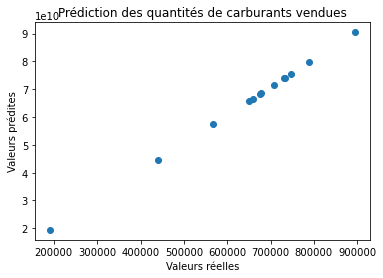

In [53]:
import matplotlib.pyplot as plt

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_pred = lr.predict(X_test)

# Tracer un graphique de dispersion des valeurs prédites par rapport aux valeurs réelles
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Prédiction des quantités de carburants vendues")
plt.show()

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

# Séparation de la variable cible
target = ['QUANTITE_TM']
features = [col for col in df_resampled.columns if col != target]
X = df_resampled[features]
y = df_resampled[target]

# Création d'un objet LinearRegression
lr = LinearRegression()

# Définition d'une mesure de performance (score) personnalisée
# ici, le score utilisé est le négatif de l'erreur quadratique moyenne (neg_mean_squared_error)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluation du modèle par validation croisée avec 10 folds
cv_scores = cross_val_score(lr, X, y, cv=10, scoring=mse_scorer)

# Calcul de la moyenne des scores obtenus
mean_cv_score = -cv_scores.mean()

# Affichage de la performance moyenne obtenue par validation croisée
print("MSE - Cross-validation score: {:.2e}".format(mean_cv_score))

MSE - Cross-validation score: 5.44e-21


2015.0 1.0
2015.0 2.0
2015.0 3.0
2015.0 4.0
2015.0 5.0
2015.0 6.0
2015.0 7.0
2015.0 8.0
2015.0 9.0
2015.0 10.0
2015.0 11.0
2015.0 12.0
2016.0 1.0
2016.0 2.0
2016.0 3.0
2016.0 4.0
2016.0 5.0
2016.0 6.0
2016.0 7.0
2016.0 8.0
2016.0 9.0
2016.0 10.0
2016.0 11.0
2016.0 12.0
2017.0 1.0
2017.0 2.0
2017.0 3.0
2017.0 4.0
2017.0 5.0
2017.0 6.0
2017.0 7.0
2017.0 8.0
2017.0 9.0
2017.0 10.0
2017.0 11.0
2017.0 12.0
2018.0 1.0
2018.0 2.0
2018.0 3.0
2018.0 4.0
2018.0 5.0
2018.0 6.0
2018.0 7.0
2018.0 8.0
2018.0 9.0
2018.0 10.0
2018.0 11.0
2018.0 12.0
2019.0 1.0
2019.0 2.0
2019.0 3.0
2019.0 4.0
2019.0 5.0
2019.0 6.0
2019.0 7.0
2019.0 8.0
2019.0 9.0
2019.0 10.0
2019.0 11.0
2019.0 12.0
2020.0 1.0
2020.0 2.0
2020.0 3.0


C:\Users\abdel\AppData\Local\Temp\ipykernel_23332\3063868211.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['QUANTITE_TM_PREDICTED'] = y_forecast


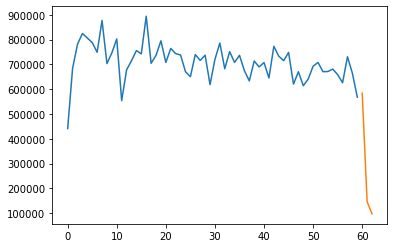

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Convertir l'index en un objet datetime
df.index = pd.to_datetime(df.index)

# Diviser la colonne dateop en colonnes YEAR et MONTH
df['YEAR'] = df.index.year
df['MONTH'] = df.index.month



# Grouper les données par mois et par année et calculer la quantité de carburants vendue pour chaque groupe
df_grouped = df.groupby(['YEAR', 'MONTH']).sum().reset_index()

# Diviser les données en données historiques et données de prévision
historical_data = df_grouped[df_grouped['YEAR'] < df_grouped['YEAR'].max()]
forecast_data = df_grouped[df_grouped['YEAR'] == df_grouped['YEAR'].max()]

# Afficher la date pour chaque ligne de données historiques
for i in range(len(historical_data)):
    print(historical_data.iloc[i]['YEAR'], historical_data.iloc[i]['MONTH'])

# Afficher la date pour chaque ligne de données de prévision
for i in range(len(forecast_data)):
    print(forecast_data.iloc[i]['YEAR'], forecast_data.iloc[i]['MONTH'])

# Séparation de la variable cible
target = 'QUANTITE_TM'
features = [col for col in df_grouped.columns if col not in [target, 'YEAR', 'MONTH']]
X_historical = historical_data[features]
y_historical = historical_data[target]
X_forecast = forecast_data[features]

# Normalisation des données historiques
scaler = StandardScaler()
scaler.fit(X_historical)
X_historical_norm = scaler.transform(X_historical)
X_forecast_norm = scaler.transform(X_forecast)

# Entraînement du modèle sur les données historiques normalisées
lr = LinearRegression()
lr.fit(X_historical_norm, y_historical)

# Prédiction des quantités de carburants vendues pour l'année suivante
y_forecast = lr.predict(X_forecast_norm)

# Ajout des prévisions à l'ensemble de données
forecast_data['QUANTITE_TM_PREDICTED'] = y_forecast

# Tracer les courbes des ventes actuelles et prévues
plt.plot(historical_data.index, historical_data['QUANTITE_TM'], label='Actual sales')
plt.plot(forecast_data.index, forecast_data['QUANTITE_TM_PREDICTED'], label='Predicted sales')







2015 1
2015 2
2015 3
2015 4
2015 5
2015 6
2015 7
2015 8
2015 9
2015 10
2015 11
2015 12
2016 1
2016 2
2016 3
2016 4
2016 5
2016 6
2016 7
2016 8
2016 9
2016 10
2016 11
2016 12
2017 1
2017 2
2017 3
2017 4
2017 5
2017 6
2017 7
2017 8
2017 9
2017 10
2017 11
2017 12
2018 1
2018 2
2018 3
2018 4
2018 5
2018 6
2018 7
2018 8
2018 9
2018 10
2018 11
2018 12
2019 1
2019 2
2019 3
2019 4
2019 5
2019 6
2019 7
2019 8
2019 9
2019 10
2019 11
2019 12
ta3 prevision
2020 1
2020 2
2020 3
Train set - MAE: 1.1583324521780014e-10
Train set - MSE: 1.4789195259060085e-20
Train set - RMSE: 1.2161083528641716e-10
Train set - R2 score: 1.0
Test set - MAE: 1.276091027718324e-10
Test set - MSE: 2.0654572636893322e-20
Test set - RMSE: 1.4371698798991482e-10
Test set - R2 score: 1.0


C:\Users\abdel\AppData\Local\Temp\ipykernel_10804\3331109202.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_data['QUANTITE_TM_PREDICTED'] = y_forecast


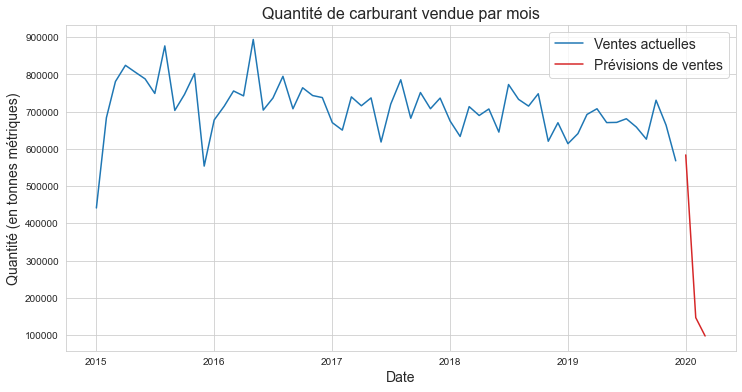

In [52]:
import seaborn as sns

# Convertir l'index en un objet datetime
df.index = pd.to_datetime(df.index)

# Diviser la colonne dateop en colonnes YEAR et MONTH
df['YEAR'] = df.index.year
df['MONTH'] = df.index.month

# Grouper les données par mois et par année et calculer la quantité de carburants vendue pour chaque groupe
df_grouped = df.groupby(['YEAR', 'MONTH']).sum().reset_index()

# Créer une nouvelle colonne 'DATE' qui contient le premier jour de chaque mois
df_grouped['DATE'] = pd.to_datetime(df_grouped[['YEAR', 'MONTH']].assign(DAY=1))

# Diviser les données en données historiques et données de prévision
historical_data = df_grouped[df_grouped['YEAR'] < df_grouped['YEAR'].max()]
forecast_data = df_grouped[df_grouped['YEAR'] == df_grouped['YEAR'].max()]

# Afficher la date pour chaque ligne de données historiques
for i in range(len(historical_data)):
    print(historical_data.iloc[i]['YEAR'], historical_data.iloc[i]['MONTH'])
print('ta3 prevision')
# Afficher la date pour chaque ligne de données de prévision
for i in range(len(forecast_data)):
    print( forecast_data.iloc[i]['YEAR'], forecast_data.iloc[i]['MONTH'])

# Séparation de la variable cible
target = 'QUANTITE_TM'
features = [col for col in df_grouped.columns if col not in [target, 'YEAR', 'MONTH', 'DATE']]
X_historical = historical_data[features]
y_historical = historical_data[target]
X_forecast = forecast_data[features]

# Normalisation des données historiques
scaler = StandardScaler()
scaler.fit(X_historical)
X_historical_norm = scaler.transform(X_historical)
X_forecast_norm = scaler.transform(X_forecast)

# Entraînement du modèle sur les données historiques normalisées
lr = LinearRegression()
lr.fit(X_historical_norm, y_historical)

# Prédiction des quantités de carburants vendues pour l'année suivante
y_forecast = lr.predict(X_forecast_norm)

# Ajout des prévisions à l'ensemble de données
forecast_data['QUANTITE_TM_PREDICTED'] = y_forecast

# vérification d'overfitting 

# Entraînement du modèle sur les données d'entraînement normalisées
lr.fit(X_train_norm, y_train)

# Prédiction des quantités de carburants vendues sur les données d'entraînement normalisées
y_train_pred = lr.predict(X_train_norm)

# Évaluation du modèle sur les données d'entraînement
print('Train set - MAE:', mean_absolute_error(y_train, y_train_pred))
print('Train set - MSE:', mean_squared_error(y_train, y_train_pred))
print('Train set - RMSE:', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('Train set - R2 score:', r2_score(y_train, y_train_pred))

# Prédiction des quantités de carburants vendues sur les données de test normalisées
y_test_pred = lr.predict(X_test_norm)

# Évaluation du modèle sur les données de test
print('Test set - MAE:', mean_absolute_error(y_test, y_test_pred))
print('Test set - MSE:', mean_squared_error(y_test, y_test_pred))
print('Test set - RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Test set - R2 score:', r2_score(y_test, y_test_pred))

# Tracer les courbes des ventes actuelles et prévues
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
plt.plot(historical_data['DATE'], historical_data['QUANTITE_TM'], label='Ventes actuelles', color='tab:blue')
plt.plot(forecast_data['DATE'], forecast_data['QUANTITE_TM_PREDICTED'], label='Prévisions de ventes', color='tab:red')
plt.title("Quantité de carburant vendue par mois", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Quantité (en tonnes métriques)", fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [49]:
import matplotlib.pyplot as plt

# Sélectionner les colonnes à utiliser pour les prévisions et le regroupement
features = ['DimDistrictFK', 'DimStructurePK', 'SA', 'designationPRD']
target = ['QUANTITE_TM']

# Agréger les données par mois pour réduire le bruit
df_resampled = df[features + target].resample('M').sum()

# Diviser les données en ensembles d'entraînement et de test
train = df_resampled.loc['2015-01-01':'2018-12-31']
test = df_resampled.loc[df_resampled.index >= '2019-01-01']

# Créer un objet de prédiction pour chaque DimStructurePK
structure_pks = df_resampled['DimStructurePK'].unique()
predictors = {}

for structure_pk in structure_pks:
    # Sélectionner les données d'entraînement pour la structure_pk courante
    train_subset = train[train['DimStructurePK'] == structure_pk]
    X_train = train_subset.drop(columns=target)
    y_train = train_subset[target]

    # Entraîner un modèle de régression linéaire
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Stocker le modèle entraîné pour cette structure_pk
    predictors[structure_pk] = lr

# Prédire les quantités de carburant vendues pour chaque DimStructurePK sur les données de test
test['QUANTITE_TM_PREDICTED'] = 0

for structure_pk in structure_pks:
    # Sélectionner les données de test pour la structure_pk courante
    test_subset = test[test['DimStructurePK'] == structure_pk]
    X_test = test_subset.drop(columns=target)

    # Prédire les quantités de carburant vendues pour cette structure_pk
    y_pred = predictors[structure_pk].predict(X_test)

    # Stocker les prévisions pour cette structure_pk
    test.loc[test['DimStructurePK'] == structure_pk, 'QUANTITE_TM_PREDICTED'] = y_pred

# Visualiser les prévisions pour chaque DimStructurePK
for structure_pk in structure_pks:
    plt.figure(figsize=(12, 6))
    plt.plot(test[test['DimStructurePK'] == structure_pk].index, test[test['DimStructurePK'] == structure_pk]['QUANTITE_TM'], label='Ventes actuelles', color='tab:blue')
    plt.plot(test[test['DimStructurePK'] == structure_pk].index, test[test['DimStructurePK'] == structure_pk]['QUANTITE_TM_PREDICTED'], label='Prévisions de ventes', color='tab:red')
    plt.title(f"Quantité de carburant vendue par mois pour DimStructurePK {structure_pk}", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Quantité (en tonnes métriques)", fontsize=14)
    plt.legend(fontsize=14)
    plt.show()

KeyError: 'DimStructurePK'